In [2]:
import pandas as pd
from pathlib import Path
data_path = Path('data')
file_path = data_path / 'CVWD Rainfall.xlsx'
dfs = pd.read_excel(file_path, sheet_name=None)
dfs.keys()

dict_keys(['Sheet1'])

In [3]:
df = dfs['Sheet1']
df.columns = df.iloc[0]
df = df.drop(0).set_index('Date')
df.head(3)

,Campus,8B
Date,,
1990-01-01,3.64,NaN
1990-02-01,3.62,NaN
1990-03-01,0.37,NaN


In [4]:
import sys
from pathlib import Path
data_path = r'\\ppeng.com\pzdata\docs\Project Resources\Ag Water\apps\district_management\data'

sys.path.append(data_path)
from CDEC import CDEC

def get_cdec(station):
	date_range = ["2015-01-01","2023-12-31"]
	DYC = CDEC(station,date_range=date_range)
	rain_df = DYC.get_data(
		45,"D"
	)
	df = rain_df.groupby([
		rain_df.index.year,rain_df.index.month
	]).agg({'value':'sum'})
	df.index = pd.to_datetime(
		df.index.to_series().apply(lambda x: f'{x[0]}-{x[1]}')
		)
	
	return df.rename(columns={'value':station})
month_rain_df = get_cdec("DYC")
month_rain_df.head(3)

,DYC
2015-01-01,0.66
2015-02-01,1.61
2015-03-01,0.20


In [5]:
import matplotlib.pyplot as plt
def plot_rainfall(full_df,top):
	df = full_df.copy().loc['2018-01-01':'2024-12-31']
	# 2015-2024

	fig, ax = plt.subplots(figsize=(12,6))
	ax.set_title('Monthly Total Precipitation')
	ax.set_ylabel('Precipitation (in)')
	ax.set_xlabel('Date')
	ax.grid(
		axis='both',
		which='minor',
		alpha=.5,
		linestyle='--'
		)
	ax.grid(
		axis='both',
		which='major',
		alpha=1
		)

	from matplotlib.ticker import MultipleLocator
	import matplotlib.dates as mdates
	ax.xaxis.set_major_locator(mdates.YearLocator())
	ax.xaxis.set_minor_locator(mdates.MonthLocator(
		bymonth=[4,7,10]
		# interval=3
	))
	ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
	# ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
	ax.xaxis.set_minor_formatter(formatter="")
	# # rotate 45 for minor ticks
	# for tick in ax.xaxis.get_major_ticks():
	# 	tick.label.set_rotation(90)
	# for tick in ax.xaxis.get_minor_ticks():
	# 	tick.label.set_rotation(90)
		# tick.label.set_horizontalalignment("right")

	ax.yaxis.set_major_locator(MultipleLocator(1))
	ax.yaxis.set_minor_locator(MultipleLocator(.25))
	ax.set_ylim(0,top)

	# ax.set_xlim('2018-01-01','2024-12-31')


	for col in df.columns:
		ax.plot(df[col],label=col)
		# ax.bar(
		# 	df[col].index,
		# 	df[col],
		# 	width=31,
		# 	alpha=.5,
		# 	label=col)
	ax.legend()
	# return fig
	# return df

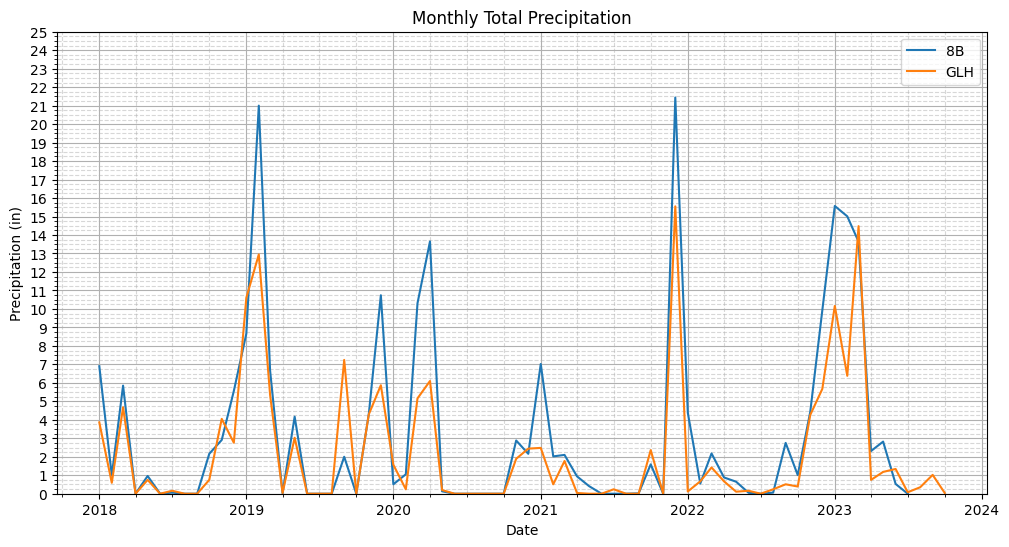

In [6]:
plot_rainfall(
	pd.concat([
		df[[
			# 'Campus',
			'8B',
			]],
		# month_rain_df,
		get_cdec(
			# "DEC"
			# "DYC",
			"GLH"
			),
	],axis=1),top=25
)


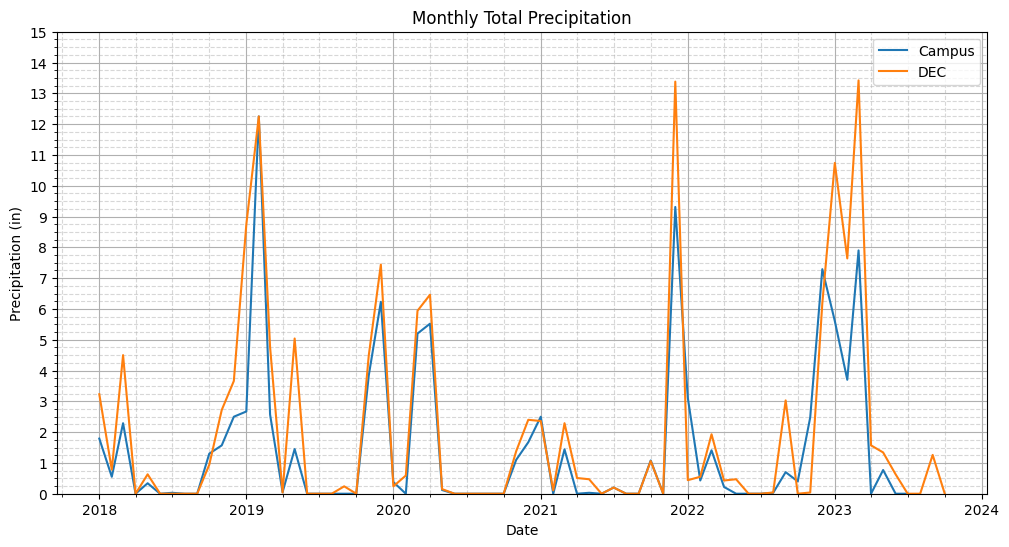

In [7]:
plot_rainfall(
	pd.concat([
		df[[
			'Campus',
			# '8B',
			]],
		# month_rain_df,
		get_cdec(
			"DEC"
			# "DYC",
			# "GLH"
			),
	],axis=1),top=15
)


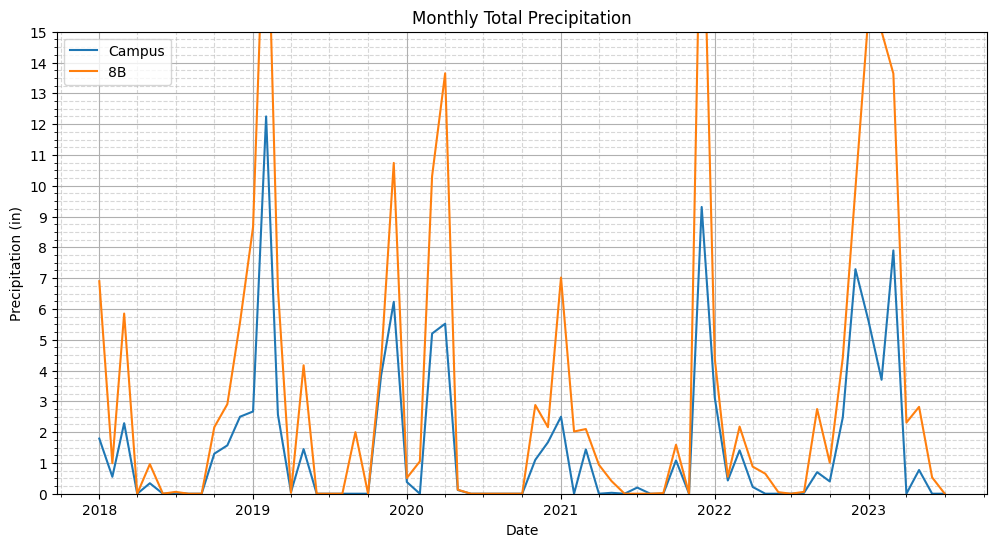

In [8]:
plot_rainfall(
	pd.concat([
		df[[
			'Campus',
			'8B',
			]],
		# month_rain_df,
		# get_cdec(
		# 	# "DEC"
		# 	"DYC",
		# 	# "GLH"
		# 	),
	],axis=1),top=15
)
